# game-analysis


In this analysis I am going to use a game sales dataset which contains the sales in millions in different region of the globe like Japan,North America etc.
I am going to use jovian module for this and different libraries like pandas,seaborn and matplotlib for data cleaning and exploration.

I am going to analyze the dataset in respect to the sales of game i.e which game is most popular in which region,which is the most used platform for gaming etc.
So lets get started.

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project="game-analysis")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "ms6050325/game-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/ms6050325/game-analysis


'https://jovian.ai/ms6050325/game-analysis'

# Importing necessary libraries 

In [5]:
import numpy as np
import pandas as pd  #for data analyzing
import matplotlib.pyplot as plt   #for data visualization
import seaborn as sns  #for data visualization

This Data consists of different games and the year they were launched along with their sales globally including North America,
Europe, Japan and other parts of the world.
We are going to use read_csv function to for reading the Csv File. The Dataframe consists of 16598 rows and 10 columns.
So now We are going to do some filtering and visual some of the insights of the dataset.

### Reading csv file

In [8]:
game_df = pd.read_csv("gamedata.csv", index_col=0) #making first row of Rank as index
game_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [9]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


## Changing the column to the correct type

The year type is float so now we have to change it to numeric. 

In [9]:
#finding the nan values in Year column
temp_df = game_df[game_df["Year"].isna()]
temp_df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53


#### Dropping all  the nan rows

In [10]:
game_df = game_df.dropna(how='any')
game_df["Year"]

Rank
1        2006.0
2        1985.0
3        2008.0
4        2009.0
5        1996.0
          ...  
16596    2002.0
16597    2003.0
16598    2008.0
16599    2010.0
16600    2003.0
Name: Year, Length: 16291, dtype: float64

In [13]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16291 non-null  object 
 1   Platform      16291 non-null  object 
 2   Year          16291 non-null  float64
 3   Genre         16291 non-null  object 
 4   Publisher     16291 non-null  object 
 5   NA_Sales      16291 non-null  float64
 6   EU_Sales      16291 non-null  float64
 7   JP_Sales      16291 non-null  float64
 8   Other_Sales   16291 non-null  float64
 9   Global_Sales  16291 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [14]:
game_df["Year"] = game_df["Year"].astype(int)
game_df.head()


/tmp/ipykernel_38/3483196206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_df["Year"] = game_df["Year"].astype(int)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Q. Sales according to years

In this we will find out sales of games in North America, Japan and Europe in different years staring from 1980 to 2020

In [15]:
sales = game_df.groupby("Year").sum()
sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
1980,10.59,0.67,0.00,0.12,11.38
1981,33.40,1.96,0.00,0.32,35.77
1982,26.92,1.65,0.00,0.31,28.86
1983,7.76,0.80,8.10,0.14,16.79
1984,33.28,2.10,14.27,0.70,50.36
1985,33.73,4.74,14.56,0.92,53.94
1986,12.50,2.84,19.81,1.93,37.07
1987,8.46,1.41,11.63,0.20,21.74
1988,23.87,6.59,15.76,0.99,47.22


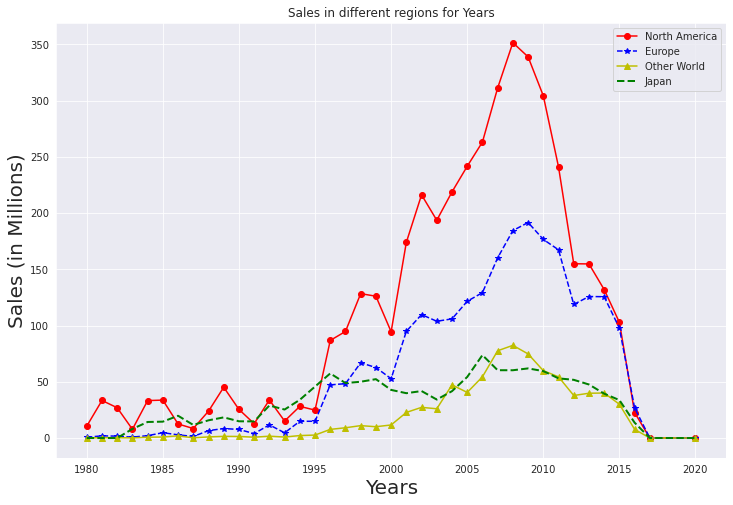

In [218]:
plt.figure(figsize=(12,8))
plt.plot(sales.index,sales.NA_Sales,"o-r",label="North America")
plt.plot(sales.index,sales.EU_Sales,"*--b",label="Europe")
plt.plot(sales.index,sales.Other_Sales,"^-y",label="Other World")
plt.plot(sales.index,sales.JP_Sales,"--g",label="Japan",linewidth=2)
plt.title("Sales in different regions for Years")
plt.xlabel("Years",fontsize=20)
plt.ylabel("Sales (in Millions)",fontsize=20)
plt.legend()
plt.show()


From the graph one can find out that sale is maximum in North America among the world.
The sale is maximum in the time span of 2008 to 2010. 

### Q.Which Platform has highest number of sales globally 

In [44]:
Platform_df = game_df.groupby("Platform").sum()
Platform_df.index

Index(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64',
       'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV',
       'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB',
       'XOne'],
      dtype='object', name='Platform')

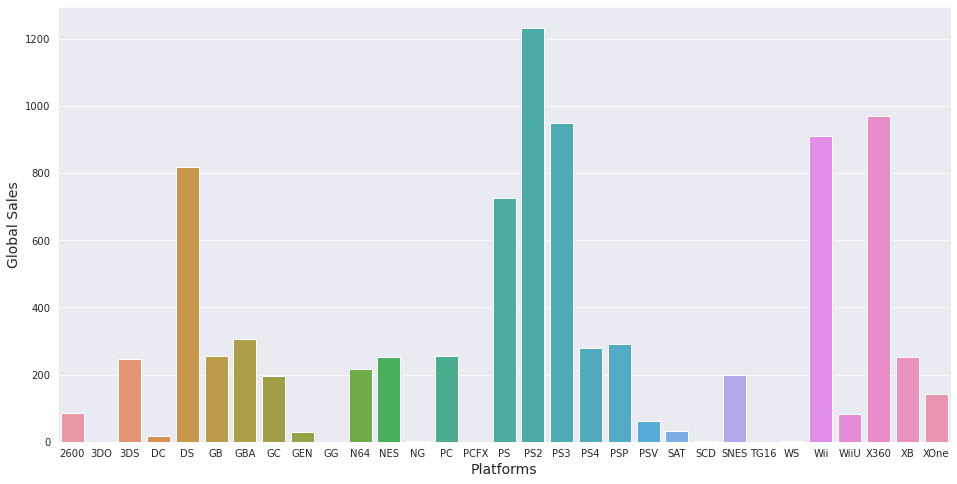

In [45]:
plt.figure(figsize=(16,8))
sns.set_style("darkgrid")
sns.barplot(x=Platform_df.index,y=Platform_df.Global_Sales)
plt.xlabel("Platforms",fontsize=14)
plt.ylabel("Global Sales",fontsize=14)
plt.show()

Most of the people use PS2 for gaming around the world as the sales for PS2 is the highest globally.
We can also assume that most of the people are using PS2 than any other gaming device thats why the sales of PS2 games are the highest. 

## Q.Which Genre is most famous or successful in America

In [106]:
game_df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [46]:
Genre_df = game_df.groupby("Genre")[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]].sum()
Genre_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,861.77,516.48,158.65,184.92,1722.84
Adventure,101.93,63.74,51.99,16.70,234.59
Fighting,220.74,100.00,87.15,36.19,444.05
Misc,396.92,211.77,106.67,73.92,789.87
Platform,445.99,200.65,130.65,51.51,829.13
Puzzle,122.01,50.52,56.68,12.47,242.21
Racing,356.93,236.31,56.61,76.68,726.76
Role-Playing,326.50,187.57,350.29,59.38,923.83
Shooter,575.16,310.45,38.18,101.90,1026.20


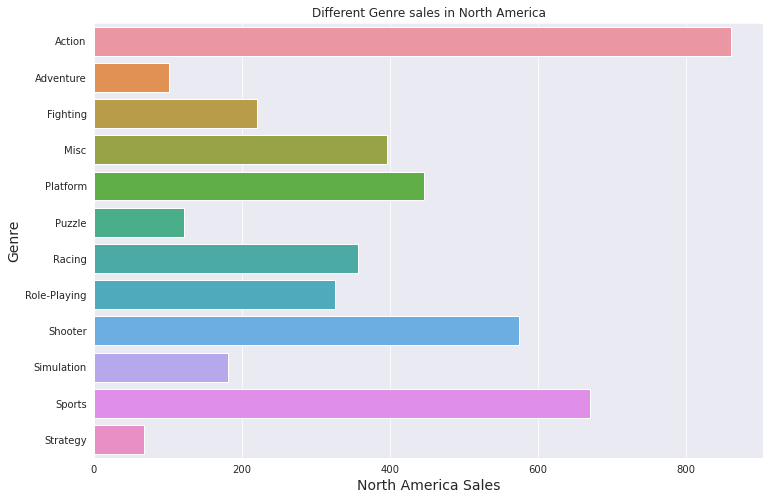

In [51]:
plt.figure(figsize=(12,8))
sns.barplot(x=Genre_df.NA_Sales,y=Genre_df.index)
plt.xlabel("North America Sales",fontsize=14)
plt.ylabel("Genre",fontsize=14)
plt.title("Different Genre sales in North America")
plt.show()

Most of the people like to play Action games in North America and after that second most popular genre is sports.

## Q.Highest selling GAME in Japan

In [182]:
z_df = game_df.max()["JP_Sales"]
z_df

10.22

In [183]:
Best_japan_game = game_df[game_df["JP_Sales"] == z_df]
Best_japan_game

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,31.37


## Q. Which region has the largest market for games

In [53]:
game_df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


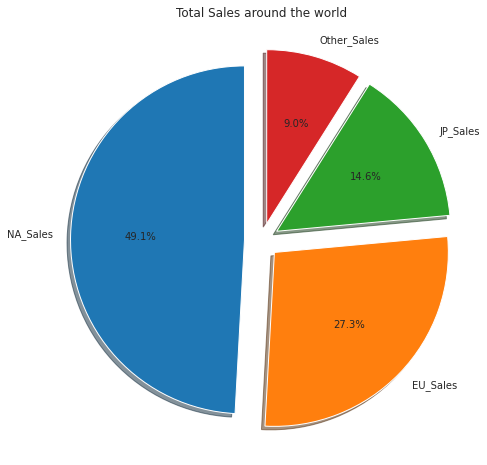

In [52]:
plt.figure(figsize=(12,8))
game_df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales"]].sum().plot.pie(ylabel=" ",title="Total Sales around the world",
                                                                         explode=(0.1,0.1,0.1,0.1),shadow=True
                                                                         ,autopct='%1.1f%%',
                                                                         startangle=90)
plt.show()

Summing the sales of all the different regions can give a layout about the largest/biggest market for the games.
In this North America comes out to be the largest market of these games as most of the sales are in this region only.

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

## Conclusion

From the give dataset one can find that how the gaming industry has grown at a high pace around the world. Nowadays most of the people around the globe are finding gaming not only as a source of entertainment but as a income  source also which is  really a positive impact on the industry.
In this dataset it is clear that most of the sales of the gaming industry has its home in North America and mostly people are using Platforms like PS2 for gaming etc.

## Future Work

1.Display more interactive graphs.
2.Country Wise Sales.

# References

https://www.kaggle.com/datasets/gregorut/videogamesales

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>